
NN_ICP6

Susmitha Bhimavarapu - 700764955

# Denoising

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(28, activation='relu')(encoded) # added
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Callbacks
# ModelCheckpoint to save the best model during training
model_checkpoint = ModelCheckpoint('best_autoencoder_model.keras', monitor='val_loss', save_best_only=True)
# EarlyStopping to stop training when validation loss doesn't improve for 5 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_noisy, x_test), callbacks=[early_stopping, model_checkpoint])


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3997 - val_loss: 0.3234
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3181 - val_loss: 0.3156
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.3115 - val_loss: 0.3101
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3067 - val_loss: 0.3073
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3046 - val_loss: 0.3055
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3013 - val_loss: 0.3047
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3012 - val_loss: 0.3032
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3000 - val_loss: 0.3024
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.2987 - val_loss: 0.3016
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2984 - val_loss: 0.3012
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2977 - val_loss: 0.3008
Epoch 12/100
1

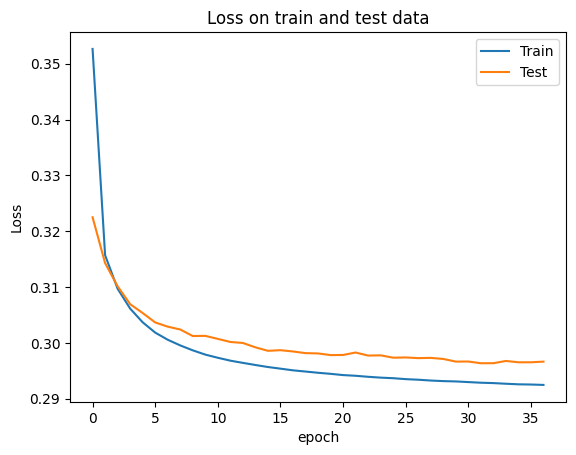

In [ ]:
# plot the training history

plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("Loss on train and test data")
plt.legend(['Train','Test'],loc='upper right')
plt.show()

In [ ]:
# Perform prediction on the noisy test data
reconstructed_images = autoencoder.predict(x_test_noisy)

# plot the test image
def validate_image(data):
    random_sample = np.random.choice(data.shape[0], 1, replace=False)
    print(f"Testing on image {random_sample[0]} \n")

    # plot noisy test data
    plt.imshow(x_test_noisy[random_sample].reshape(28, 28))
    plt.title("Noisy Test Image")
    plt.show()

    # plot the reconstructed image (from the predicted data)
    plt.imshow(data[random_sample].reshape(28, 28))
    plt.title("Reconstructed Image")
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Testing on image 995 



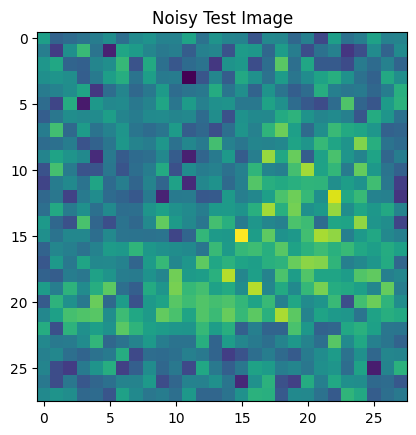

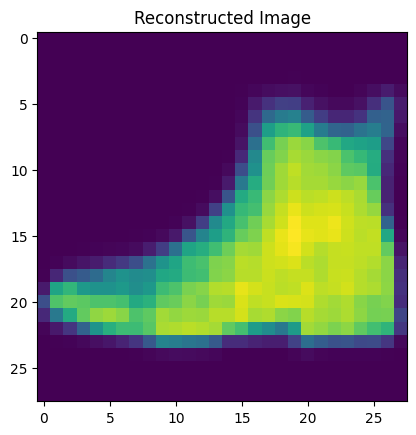

In [ ]:
# Call the validate_image function with the reconstructed images

validate_image(reconstructed_images)

Video Link: https://drive.google.com/file/d/1_mjpy5NlHP6bPmY44P_j0cKGrhSppUZN/view?usp=sharing